In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [39]:
df = pd.read_csv('dados_treino_v8.csv', sep='|')
# df.head()
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
# df.head()
headers = list(df.columns)[2:]
X = df[headers]
y = df['internacao']
df[headers].head()

,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,28.620098,31.930049,21.833099,80.276419,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22.559984,28.459289,21.524707,81.938460,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,23.173989,29.115721,20.771323,87.768694,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29.538983,30.253300,21.908878,79.161412,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,33.311234,26.157899,21.339680,81.960879,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
X[headers].head()

,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0.217744,0.254960,0.688959,0.771206,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.167354,0.225945,0.674581,0.790496,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.172460,0.231433,0.639458,0.858161,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.225385,0.240942,0.692492,0.758266,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.256751,0.206706,0.665955,0.790756,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#over sampling
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [42]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred = tree.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [45]:
tree_rules = export_text(tree, feature_names=list(X.columns))
print("\nRegras da árvore de decisão:")
print(tree_rules)


Regras da árvore de decisão:
|--- DS_CID_BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RESPIRATORIO <= 0.50
|   |--- DS_CID_BRONQUIOLITE AGUDA <= 0.50
|   |   |--- DS_CID_INSUFICIENCIA RESPIRATORIA AGUDA <= 0.50
|   |   |   |--- DS_CID_ASMA NAO ESPECIFICADA <= 0.50
|   |   |   |   |--- DS_CID_INFECCAO AGUDA DAS VIAS AEREAS SUPERIORES NAO ESPECIFICADA <= 0.50
|   |   |   |   |   |--- DS_CID_PNEUMONIA POR MICROORGANISMO NAO ESPECIFICADA <= 0.50
|   |   |   |   |   |   |--- DS_CID_INSUFICIENCIA RESPIRATORIA NAO CLASSIFICADA DE OUTRA PARTE <= 0.50
|   |   |   |   |   |   |   |--- DS_CID_HIPERTROFIA DOS CORNETOS NASAIS <= 0.50
|   |   |   |   |   |   |   |   |--- DS_CID_HIPERTROFIA DAS AMIGDALAS COM HIPERTROFIA DAS ADENOIDES <= 0.50
|   |   |   |   |   |   |   |   |   |--- DS_CID_BRONQUITE AGUDA <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- DS_CID_BRONQUITE AGUDA NAO ESPECIFICADA <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 72
|   |   |   |   |   

<Axes: xlabel='Predicted', ylabel='Actual'>

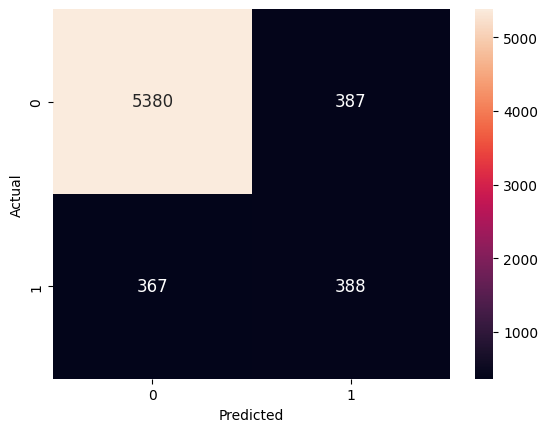

In [46]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [47]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print ('Specificity: ', specificity)

Accuracy:  0.8843912910150261
Sensitivity (Recall): 0.5139072847682119
Specificity:  0.9328940523669152


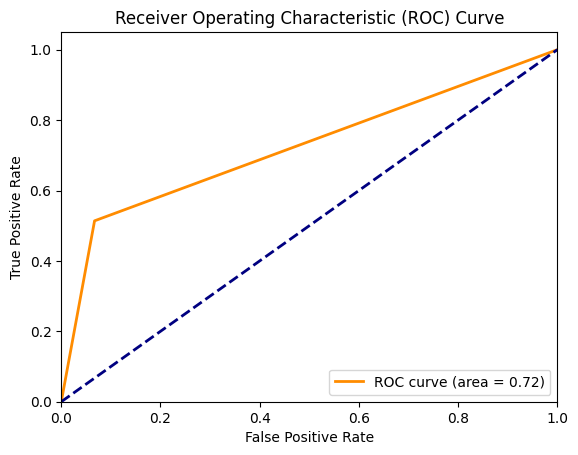

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()